In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("preprocessed_unsw2.csv", index_col=0)

In [4]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
dur,,,,,,,,,,,,,,,,,,,,,
0.001500,0.900000,0.000000,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
0.001091,0.900000,0.000000,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
0.000682,0.900000,0.000000,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667,0
0.000818,0.900000,0.000000,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
0.001364,0.900000,0.000000,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.326923,0.853846,0.000000,0.4,0.097872,0.092437,0.568957,0.424739,0.804951,0.444444,0.166667,...,0.0,0.035714,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667,0
0.430578,0.853846,0.000000,0.4,0.272340,0.252101,0.613838,0.622101,0.841268,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667,0
0.725314,0.853846,0.416667,0.4,0.046809,0.063025,0.288920,0.650750,0.303047,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.2,0.020408,0.000000,0.0,0.666667,0


In [5]:
df.label.value_counts()

1    23117
0     2230
Name: label, dtype: int64

In [6]:
X = df.drop('label', axis=1)
y = df['label']

In [7]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE(random_state=42).fit_resample(X, y)

In [8]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 23117), (1, 23117)]


In [9]:
X_train_s,X_test,y_train_s,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [10]:
#random forest

rfc = RandomForestClassifier(n_estimators=100,random_state = 42)
# rfc.fit(X_train_s, y_train_s)
# rfc_pred = rfc.predict(X_test)

In [11]:
# print(accuracy_score(y_test,rfc_pred))
# print(classification_report(y_test,rfc_pred))

In [12]:
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train_s,y_train_s)
# predictions = gbc.predict(X_test)
# print(accuracy_score(y_test, predictions))
# print(classification_report(y_test,predictions))

In [14]:
lr = LogisticRegression()
lr.fit(X_train_s,y_train_s)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.9816156591326917
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4606
           1       0.97      0.99      0.98      4641

    accuracy                           0.98      9247
   macro avg       0.98      0.98      0.98      9247
weighted avg       0.98      0.98      0.98      9247



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train_s, y_train_s)
pred_knneigh = knneig.predict(X_test)
score_knneigh_before = accuracy_score(y_test, pred_knneigh)
print("Score KNeighnors :",score_knneigh_before)
print(classification_report(y_test, pred_knneigh))

Score KNeighnors : 0.9871309613928841
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4606
           1       0.99      0.98      0.99      4641

    accuracy                           0.99      9247
   macro avg       0.99      0.99      0.99      9247
weighted avg       0.99      0.99      0.99      9247



In [16]:
# xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
# xg.fit(X_train_s,y_train_s)
# predictions = xg.predict(X_test)
# print(accuracy_score(y_test, predictions))
# print(classification_report(y_test,predictions))

In [17]:
# ada = AdaBoostClassifier(n_estimators=100, random_state = 42)
# ada.fit(X_train_s,y_train_s)
# predictions = ada.predict(X_test)
# print(accuracy_score(y_test, predictions))
# print(classification_report(y_test,predictions))

In [18]:
#svc

svc = SVC(kernel='linear', probability=True)
svc.fit(X_train_s,y_train_s)
predictions = svc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.9834540932194226
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4606
           1       0.98      0.99      0.98      4641

    accuracy                           0.98      9247
   macro avg       0.98      0.98      0.98      9247
weighted avg       0.98      0.98      0.98      9247



In [21]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_s,y_train_s)
predictions = mlp.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.9997837136368551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4606
           1       1.00      1.00      1.00      4641

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247



In [22]:
#GaussianNB

nb = GaussianNB()
nb.fit(X_train_s,y_train_s)
predictions = nb.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.9570671569157565
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4606
           1       0.92      1.00      0.96      4641

    accuracy                           0.96      9247
   macro avg       0.96      0.96      0.96      9247
weighted avg       0.96      0.96      0.96      9247



In [24]:
# ROC Curve

r_probs = [0 for _ in range(len(y_test))]

KNN_probs = knneig.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
svc_probs = svc_probs[:, 1]
LR_probs = LR_probs[:, 1]
nb_probs = nb_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

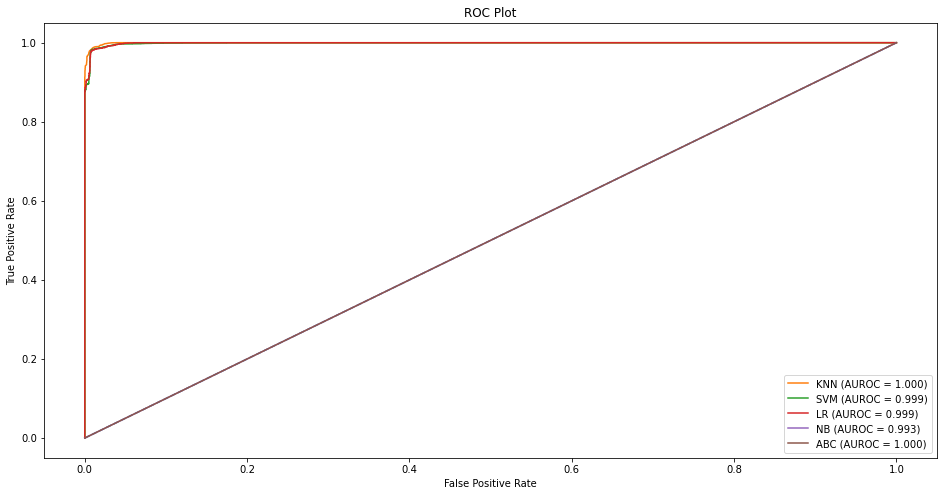

In [25]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(svc_fpr, svc_tpr, label='SVM (AUROC = %0.3f)' % svc_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(nb_fpr, nb_fpr, label='NB (AUROC = %0.3f)' % nb_auc)
plt.plot(mlp_fpr, mlp_fpr, label='ABC (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [26]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (42,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train_s,y_train_s,epochs=50,batch_size=60)

Epoch 1/50
1209/1209 [==============================] - 1s 493us/step - loss: 0.1658 - accuracy: 0.9280
Epoch 2/50
1209/1209 [==============================] - 1s 486us/step - loss: 0.0735 - accuracy: 0.9724
Epoch 3/50
1209/1209 [==============================] - 1s 487us/step - loss: 0.0313 - accuracy: 0.9905
Epoch 4/50
1209/1209 [==============================] - 1s 461us/step - loss: 0.0118 - accuracy: 0.9974
Epoch 5/50
1209/1209 [==============================] - 1s 457us/step - loss: 0.0073 - accuracy: 0.9985
Epoch 6/50
1209/1209 [==============================] - 1s 461us/step - loss: 0.0048 - accuracy: 0.9989
Epoch 7/50
1209/1209 [==============================] - 1s 472us/step - loss: 0.0031 - accuracy: 0.9993
Epoch 8/50
1209/1209 [==============================] - 1s 466us/step - loss: 0.0027 - accuracy: 0.9993
Epoch 9/50
1209/1209 [==============================] - 1s 478us/step - loss: 0.0012 - accuracy: 0.9997
Epoch 10/50
1209/1209 [==============================] - 1s 462u

In [30]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9043
           1       1.00      1.00      1.00      9090

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



Text(0.5, 1.0, 'Loss and Accuracy plot')

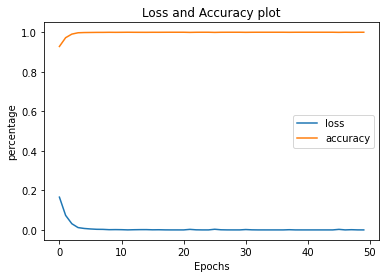

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

## RFECV

In [32]:
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve, cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold

# rfecv = RFECV(estimator=rfc, cv=StratifiedKFold(5, random_state=42, shuffle=True), scoring="accuracy")
# rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [33]:
# rfecv.n_features_

1

In [34]:
# X_rfe = X.iloc[:, rfecv.support_]

In [35]:
# print("\"X\" dimension: {}".format(X.shape))
# print("\"X\" column list:", X.columns.tolist())
# print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
# print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (90664, 42)
"X" column list: ['proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
"X_rfe" dimension: (90664, 1)
"X_rfe" column list: ['attack_cat']


## Feature Importances

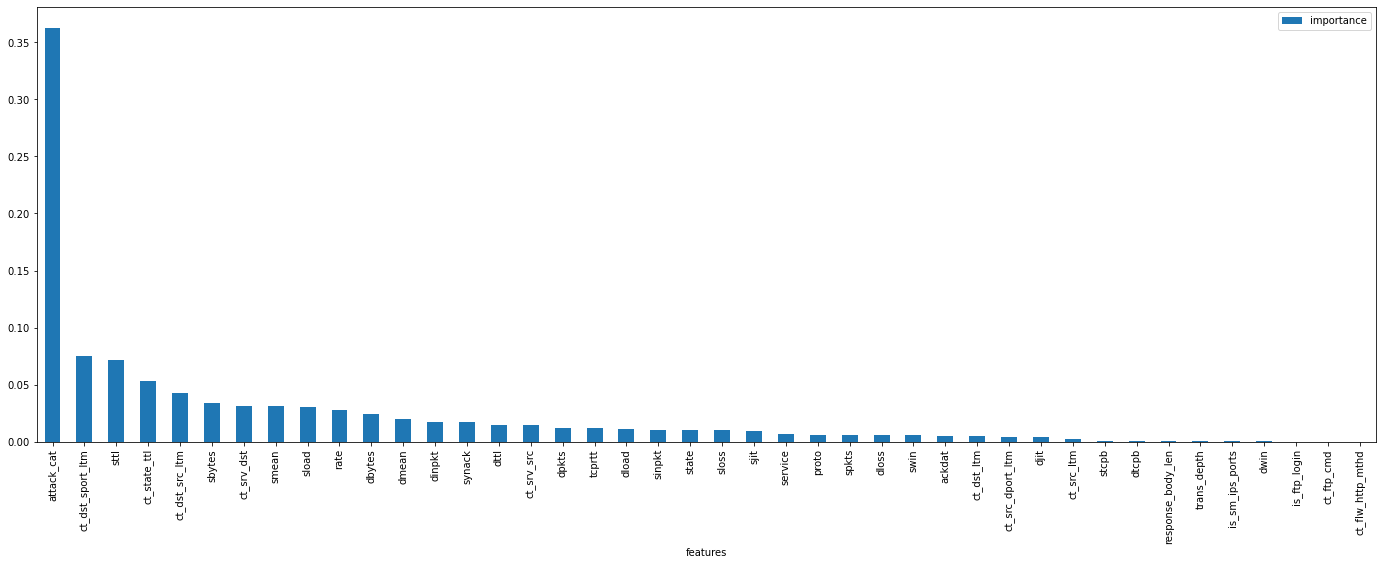

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X, y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'features':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('features')
# plot importances
plt.rcParams['figure.figsize'] = (24, 8)
importances.plot.bar();

## RFE

In [20]:
from sklearn.feature_selection import RFE
import itertools


# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['dpkts',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'tcprtt',
 'ackdat',
 'smean',
 'dmean',
 'ct_state_ttl',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'attack_cat']

In [21]:
X_rfe = X.iloc[:, rfe.support_]

In [22]:
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (46234, 42)
"X" column list: ['proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
"X_rfe" dimension: (46234, 15)
"X_rfe" column list: ['dpkts', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'tcprtt', 'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'ct_dst_src_ltm', 'ct_srv_dst', 'attack_cat']


## Apply ML after RFE

In [23]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [24]:
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe, y, 
                                                                             test_size=0.2, 
                                                                             stratify=y,
                                                                             random_state=42)
print("Train size: {}".format(len(y_train)))
print("Test size: {}".format(len(y_test)))

Train size: 36987
Test size: 9247


In [25]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=2)
knneig.fit(X_rfe_train, y_train)
# pred_knneigh = knneig.predict(X_test_g)
# score_knneigh_before = accuracy_score(y_test, pred_knneigh)
# print(score_knneigh_before)
predict(knneig,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, knneig.predict(X_rfe_test)))

Training Accuracy: 99.98
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00      4623

    accuracy                           1.00      9247
   macro avg       1.00      1.00      1.00      9247
weighted avg       1.00      1.00      1.00      9247



In [46]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, rf.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



In [47]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, lr.predict(X_rfe_test)))

Training Accuracy: 92.6
Testing  Accuracy: 92.52
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9067
           1       0.94      0.90      0.92      9066

    accuracy                           0.93     18133
   macro avg       0.93      0.93      0.93     18133
weighted avg       0.93      0.93      0.93     18133



In [48]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, gbc.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



In [49]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, ada.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



In [51]:
# DT
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
predict(dt,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, dt.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



In [52]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, nb.predict(X_rfe_test)))

Training Accuracy: 98.76
Testing  Accuracy: 98.79
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9067
           1       0.98      1.00      0.99      9066

    accuracy                           0.99     18133
   macro avg       0.99      0.99      0.99     18133
weighted avg       0.99      0.99      0.99     18133



In [53]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, xg.predict(X_rfe_test)))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [55]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, svc.predict(X_rfe_test)))

Training Accuracy: 95.47
Testing  Accuracy: 95.38
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9067
           1       1.00      0.91      0.95      9066

    accuracy                           0.95     18133
   macro avg       0.96      0.95      0.95     18133
weighted avg       0.96      0.95      0.95     18133



In [54]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
predict(mlp,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, mlp.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133



In [56]:
# ROC Curve

r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_rfe_test)
RF_probs = rf.predict_proba(X_rfe_test)
GBC_probs = gbc.predict_proba(X_rfe_test)
ADA_probs = ada.predict_proba(X_rfe_test)
LR_probs = lr.predict_proba(X_rfe_test)
svc_probs = svc.predict_proba(X_rfe_test)
nb_probs = nb.predict_proba(X_rfe_test)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
ADA_probs = ADA_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
ADA_auc = roc_auc_score(y_test, ADA_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(y_test, ADA_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

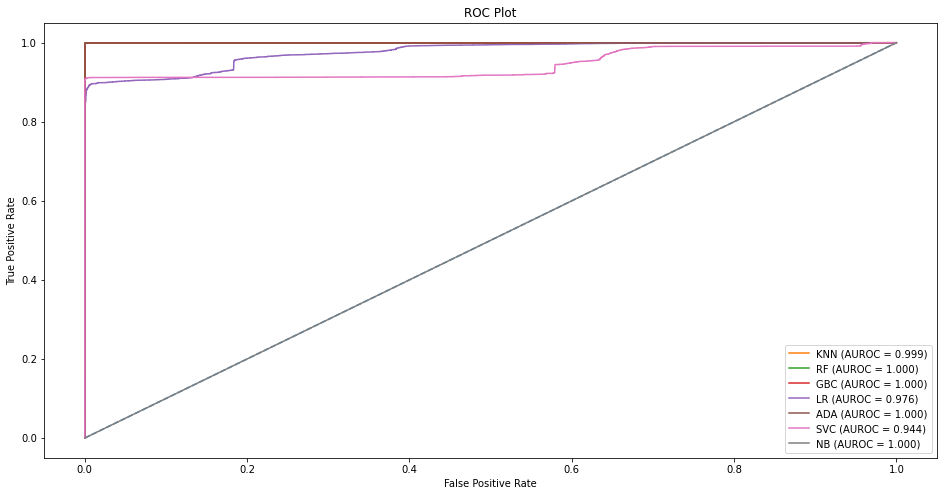

In [59]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(ADA_fpr, ADA_tpr, label='ADA (AUROC = %0.3f)' % ADA_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_fpr, label='NB (AUROC = %0.3f)' % nb_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [60]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_rfe_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
1209/1209 [==============================] - 1s 493us/step - loss: 0.1512 - accuracy: 0.9393
Epoch 2/50
1209/1209 [==============================] - 1s 483us/step - loss: 0.0361 - accuracy: 0.9892
Epoch 3/50
1209/1209 [==============================] - 1s 450us/step - loss: 0.0091 - accuracy: 0.9986
Epoch 4/50
1209/1209 [==============================] - 1s 458us/step - loss: 0.0043 - accuracy: 0.9993
Epoch 5/50
1209/1209 [==============================] - 1s 449us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 6/50
1209/1209 [==============================] - 1s 448us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 7/50
1209/1209 [==============================] - 1s 475us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 8/50
1209/1209 [==============================] - 1s 464us/step - loss: 0.0012 - accuracy: 0.9998
Epoch 9/50
1209/1209 [==============================] - 1s 481us/step - loss: 8.7369e-04 - accuracy: 0.9999
Epoch 10/50
1209/1209 [==============================] - 1s 

Text(0.5, 1.0, 'Loss and Accuracy plot')

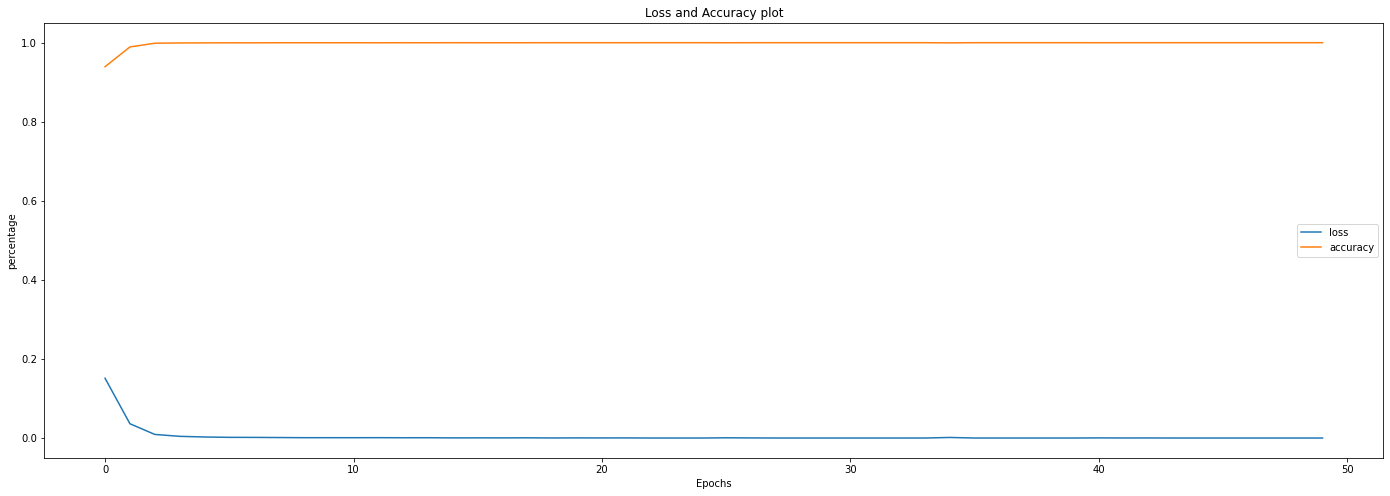

In [63]:
y_pred=model.predict(X_rfe_test)

y_pred = (y_pred>0.5)

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9067
           1       1.00      1.00      1.00      9066

    accuracy                           1.00     18133
   macro avg       1.00      1.00      1.00     18133
weighted avg       1.00      1.00      1.00     18133

